# Shawn Goh

## How does the maturity level of students affect their adaptability to online learning

Personally, I felt I became more interested in learning as I grew older, and especially when I entered collage where I am taking courses that are slightly more specialzed in topics I am personally interested about. This led me to wonder if different maturity level might affect how adaptable students are to online learning, and I plan to look for any correlation between age/education level and their adaptability to online learning. Firstly I would need a good way to define maturity. For example, should it be more based on age or education level? Besides, would other factors possibly play a part, such as gender? With that in mind, I can then compare how adaptable students are to online learning with some visualisation, possibly a box plot. 

In [12]:
import pandas as pd
import numpy as np

def create_numeric_adaptibility():
    numeric_var = {"Numeric Adaptability":{"Low":0, "Moderate":1, "High":2}}
    df["Numeric Adaptability"] = df["Adaptivity Level"]
    df = df.replace(numeric_var)

def load_dataset(path):
    df = (pd.read_csv(path)
          .drop(["Gender", "Institution Type", "IT Student", "Location", "Load-shedding", "Financial Condition", "Internet Type", "Network Type", "Class Duration", "Device"], axis = "columns")
          .create_numeric_adaptibility())
          
    return df

In [4]:
import pandas as pd
import seaborn as sns

mainDF = pd.read_csv("../data/raw/adaptability.csv")
mainDF

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [5]:
df = mainDF.drop(["Gender", "Institution Type", "IT Student", "Location", "Load-shedding", "Financial Condition", "Internet Type", "Network Type", "Class Duration", "Device"], axis = "columns")
df

,Age,Education Level,Self Lms,Adaptivity Level
0,21-25,University,No,Moderate
1,21-25,University,Yes,Moderate
2,16-20,College,No,Moderate
3,11-15,School,No,Moderate
4,16-20,School,No,Low
...,...,...,...,...
1200,16-20,College,No,Low
1201,16-20,College,No,Moderate
1202,11-15,School,No,Moderate
1203,16-20,College,No,Low


In [6]:
df.describe()

,Age,Education Level,Self Lms,Adaptivity Level
count,1205,1205,1205,1205
unique,6,3,2,3
top,21-25,School,No,Moderate
freq,374,530,995,625


In [7]:
df.isna().sum()

Age                 0
Education Level     0
Self Lms            0
Adaptivity Level    0
dtype: int64

In [8]:
df.nunique()

Age                 6
Education Level     3
Self Lms            2
Adaptivity Level    3
dtype: int64

# My plan: 

Used columns: Age, Education level, Self LMS, Adaptivity Level

Chosen data visualization for explatory: 
- Barplot: A simple way to get a count of the number of different students adaptivity level and age/education level


Immediately, I wanted a simple visualization that would highlight if there was any correlation between age and adaptability levels, which lead me to creating a simple countplot

<AxesSubplot:xlabel='Age', ylabel='count'>

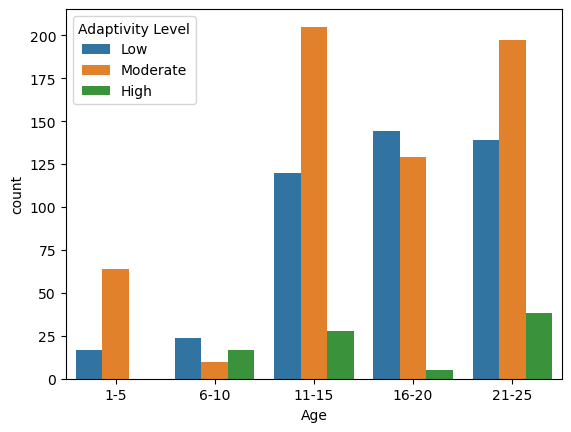

In [ ]:
age_order = ["1-5", "6-10", "11-15", "16-20", "21-25"]
hue_order = ["Low", "Moderate", "High"]

sns.countplot(data = df, x = "Age", hue = "Adaptivity Level", order = order, hue_order = hue_order)

The count plot sorts the responses into the age groups and tells us how many of each reponses there was, but the number of responses recorded for each age group is not necessarily the same, and it is difficult to judge if people of a certain age group on average was more adaptable to online learning. 

To get a better idea of that, I assigned values for each adaptivity level (0 for low, 1 for moderate and 2 for high), and took the average value for each age group and used a barplot to plot the results.

In [ ]:
#Creating new column with adaptivity levels as numeric values
numeric_var = {"Numeric Adaptability":{"Low":0, "Moderate":1, "High":2}}
df["Numeric Adaptability"] = df["Adaptivity Level"]
df = df.replace(numeric_var)
df

,Age,Education Level,Self Lms,Adaptivity Level,Numeric Adaptability
0,21-25,University,No,Moderate,1
1,21-25,University,Yes,Moderate,1
2,16-20,College,No,Moderate,1
3,11-15,School,No,Moderate,1
4,16-20,School,No,Low,0
...,...,...,...,...,...
1200,16-20,College,No,Low,0
1201,16-20,College,No,Moderate,1
1202,11-15,School,No,Moderate,1
1203,16-20,College,No,Low,0


<seaborn.axisgrid.FacetGrid>

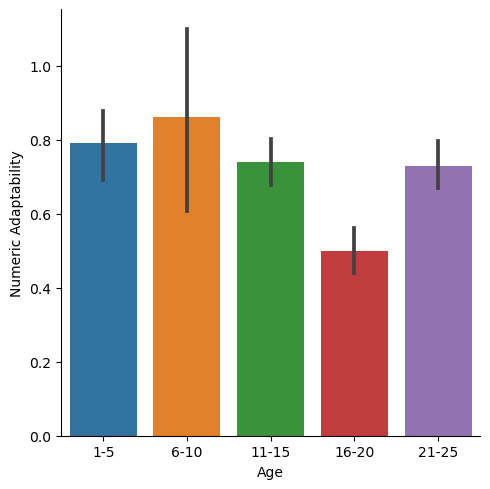

In [ ]:
sns.catplot(data = df, kind = "bar", x = "Age", y = "Numeric Adaptability", order = age_order)

From this graph we can see that people of ages 16-20 have the worst adaptability score our of all the age groups.
A similar plot can be used for other siginificant factors, such as Education Level

<seaborn.axisgrid.FacetGrid>

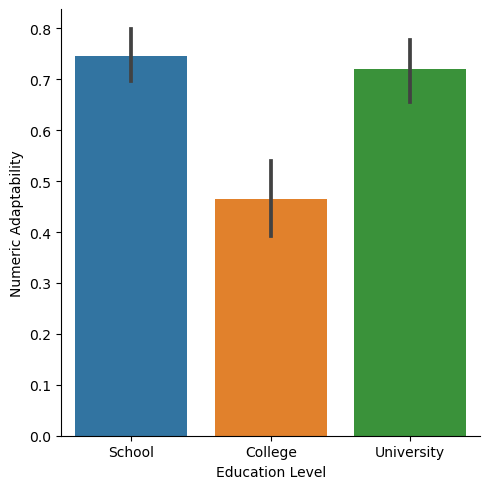

In [ ]:
sns.catplot(data = df, kind = "bar", x = "Education Level", y = "Numeric Adaptability", order = ["School", "College", "University"])

Catplot works well with single variables, and it is easy to tell from the two graphs how well students of different age groups or students at different education level fair. 
In this case, it appears that college level students are finding it the hardest to adapt to online learning. 
However, we could go into even more detail if there was a way to show both variables side by side. 

The heatmap gives us a way to show two of these variables simultaneously by having the age group on one axis and the education on the other. 

<AxesSubplot:xlabel='Education Level', ylabel='Age'>

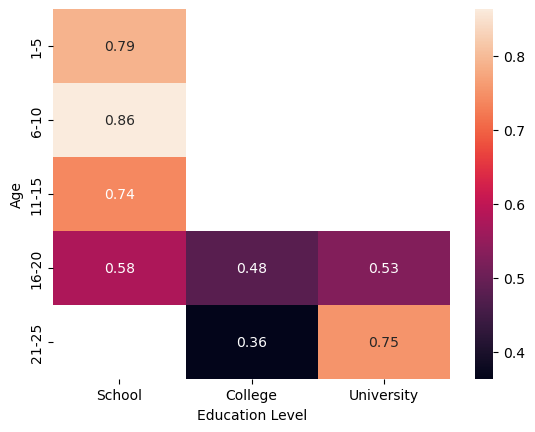

In [ ]:
pivotDF = df.pivot_table(values = "Numeric Adaptability", index = "Age", columns = "Education Level")
pivotDF = pivotDF.reindex(order, axis = 0)
pivotDF = pivotDF.reindex(["School", "College", "University"], axis = 1)
sns.heatmap(data = pivotDF, annot = True)